<a href="https://colab.research.google.com/github/FantySantos/Estatistica_e_LLMs/blob/main/Atividade_1_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1 — Z-score e Binomial Distribution Sample distribution and sampling distribution TLC p-value

Atividade apresentada como parte da avaliação da disciplina Tópicos especiais: Introdução à Estatística e LLMs ministrada pelo professor Claudomiro de Souza de Sales Junior para o curso
de Sistemas de Informação do Instituto de Ciências Exatas
e Naturais da Universidade Federal do Pará - Campus
Guamá.

Aluna: Fantiny Santos dos Santos 202211140005

---

## Preparação do Ambiente

In [1]:
import kagglehub
import itertools
from scipy.stats import norm, gamma
import scipy.stats as stats
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import math
import pandas as pd
pd.options.plotting.backend = "plotly"

## Parte 2 — Sample distribution and sampling distribution, TLC and p-value

### Questão A - A partir do que foi feito na Atividade 2 "Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho", crie uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

#### Contextualização

Considere que a população de pacientes estudada (Atividade 1 - Parte 1: Questão B), definida anteriormente, é extremamente extensa. Na prática, raramente temos acesso aos dados completos de toda uma população. O mais comum é trabalharmos com amostras pequenas, como grupos de 50 pacientes, para então realizar inferências sobre o comportamento geral da variável de interesse.

#### Carregando os dados da Questão B - Parte 1

##### Como o notebook desta atividade precisou ser dividido em duas partes para manter a organização e evitar excesso de conteúdo, nesta segunda parte retomamos a estrutura necessária: carregamos novamente o dataset utilizado na Atividade B – Parte 1 e reconstruímos os dados artificiais gerados anteriormente, porém, com o tamanho de 100000 registros.

In [2]:
df = kagglehub.dataset_load(
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "uciml/pima-indians-diabetes-database",
    "diabetes.csv",
)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


In [3]:
np.random.seed(42)
glucose_artificial = np.random.normal(df['Glucose'].mean(), df['Glucose'].std(), 100000)

#### Sample Distribution

Refere-se à distribuição dos dados dentro de uma única amostra de tamanho n. Espera-se que ela se assemelhe à distribuição da população, mas com mais "ruído" e irregularidades devido ao tamanho reduzido.

In [4]:
amostra_unica = np.random.choice(glucose_artificial, 50)

In [5]:
fig = px.histogram(x=amostra_unica, histnorm='probability density', title="Histograma e distribuição de uma única amostra dos dados artificiais de glicose", labels={'x': 'Glucose'})

xmin, xmax = min(amostra_unica), max(amostra_unica)
x = np.linspace(xmin, xmax, 1000)
mu, sigma = norm.fit(amostra_unica)
pdf = norm.pdf(x, mu, sigma)

fig.add_trace(go.Scatter(
    x=x,
    y=pdf,
    mode='lines',
    name=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})',
))
fig.show()

#### Sampling Distribution

É a distribuição das médias de várias amostras retiradas da população. Pelo Teorema do Limite Central, mesmo que a população não fosse normal, a distribuição das médias tende a ser normal.

In [6]:
medias_amostrais = [np.mean(np.random.choice(glucose_artificial, 50)) for _ in range(200)]

In [7]:
fig = px.histogram(x=medias_amostrais, histnorm='probability density', title="Histograma e distribuição das médias de 200 amostras dos dados artificiais de glicose", labels={'x': 'Glucose'})

xmin, xmax = min(medias_amostrais), max(medias_amostrais)
x = np.linspace(xmin, xmax, 1000)
mu, sigma = norm.fit(medias_amostrais)
pdf = norm.pdf(x, mu, sigma)

fig.add_trace(go.Scatter(
    x=x,
    y=pdf,
    mode='lines',
    name=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})',
))

fig.show()

#### Distribuição da População, das Médias de 200 Amostras e da Curva do Teorema do Limite Central

O Erro Padrão (Standard Error): A característica mais importante da Sampling Distribution é que ela é muito mais "estreita" que a população. O desvio padrão das médias (chamado de Erro Padrão) é calculado por:

<div align="center">

$$
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
$$

**Equação 1: Equação do Erro Padrão**

</div>

In [8]:
xmin, xmax = min(glucose_artificial), max(glucose_artificial)
x = np.linspace(xmin, xmax, 1000)
mu, sigma = norm.fit(glucose_artificial)
pdf = norm.pdf(x, mu, sigma)

fig = px.scatter(
    x=x,
    y=pdf / max(pdf),
    labels={
        "x": "Glucose",
        "y": f"Normal Fit (μ={mu:.2f}, σ={sigma:.2f})"
    },
    title="Distribuição da População, das Médias de 200 Amostras e da Curva do Teorema do Limite Central"
)

erro_padrao = sigma / math.sqrt(50)
curva_tlc = np.random.normal(mu, erro_padrao, 100000)
xmin, xmax = min(curva_tlc), max(curva_tlc)
x = np.linspace(xmin, xmax, 1000)
pdf_tlc = norm.pdf(x, mu, erro_padrao)

fig.add_trace(go.Scatter(
    x=x,
    y=pdf_tlc / max(pdf_tlc),
    mode='lines',
    name=f'Normal Fit TLC (μ={mu:.2f}, σμ={erro_padrao:.2f})',
))

xmin, xmax = min(medias_amostrais), max(medias_amostrais)
x = np.linspace(xmin, xmax, 1000)
mu, sigma = norm.fit(medias_amostrais)
pdf_sampling = norm.pdf(x, mu, sigma)

fig.add_trace(go.Scatter(
    x=x,
    y=pdf_sampling / max(pdf_sampling),
    mode='lines',
    name=f'Normal Fit (μ={mu:.2f}, σμ={sigma:.2f})',
))

fig.show()

#### Avaliação de Probabilidade de um Evento

##### Qual a probabilidade da média de glicose de um grupo de 50 pacientes ser maior que 130mg/dL?

Ao calcularmos probabilidades sobre a média de um grupo (e não sobre um indivíduo), devemos usar $\sigma_{\bar{x}}$ no denominador do Z-Score:

<div align="center">

  $$
  z = \frac{\bar{x} - \mu}{\sigma_{\bar{x}}}
  $$

  **Equação 2: Z-Score para a média amostral**

</div>

In [9]:
mu, sigma = norm.fit(glucose_artificial)
erro_padrao = sigma / math.sqrt(50)
valor_interesse = 130

In [10]:
z_sampling = (valor_interesse - mu) / erro_padrao
z_sampling

np.float64(2.005123171446862)

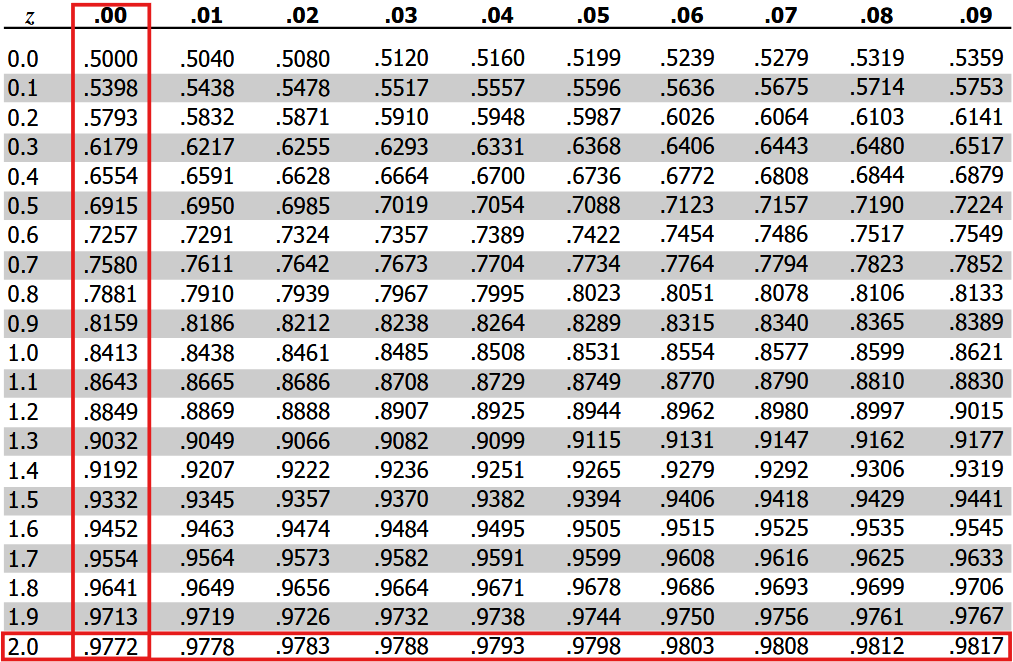

In [11]:
(1 - 0.9772) * 100

2.2800000000000042

Assim temos que a probabilidade da glicose média de um grupo de 50 pacientes ser > 130, é de 2.28%

### Questão B - Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

#### Distribuição Gama

In [12]:
populacao_gamma = np.random.gamma(shape=2, scale=1, size=1000)
x = np.linspace(min(populacao_gamma), max(populacao_gamma), 1000)
pdf = gamma.pdf(x, 2, scale=1)
fig = px.line(x=x, y=pdf, title="Distribução Gama")
fig.show()

#### TLC aplicado a distribuição gamma com tamanhos de amostra de 10, 100, 500 e 1000

In [13]:
tamanhos_amostra = [10, 100, 500, 1000]

for i, n in enumerate(tamanhos_amostra):
  medias_amostrais = [np.mean(np.random.choice(populacao_gamma, n)) for _ in range(200)]
  fig = px.histogram(x=medias_amostrais, histnorm='probability density', title=f'Tamanho da amostra {n}', nbins=30)

  xmin, xmax = min(medias_amostrais), max(medias_amostrais)
  x = np.linspace(xmin, xmax, 1000)
  mu, sigma = norm.fit(medias_amostrais)
  pdf = norm.pdf(x, mu, sigma)

  fig.add_trace(go.Scatter(
      x=x,
      y=pdf,
      mode='lines',
      name=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})',
  ))

  fig.show()

### Questão C - Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.

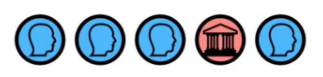

#### Contextualização

Dado um experimento de 5 lançamentos de uma moeda onde observamos o evento '4 caras e 1 coroa', vamos calcular o p-valor (p-value) para testar a hipótese de que a moeda é justa (probabilidade de cara = 0.5).

Para calcular o p-valor, devemos somar:
* A probabilidade do que vimos (4 caras).
* A probabilidade de eventos ainda mais extremos.

In [14]:
n = 5
opcoes = ['Cara', 'Coroa']

In [15]:
espaco_amostral = list(itertools.product(opcoes, repeat=n))
df_espaco = pd.DataFrame(espaco_amostral, columns=[f'Lançamento {i+1}' for i in range(n)])
df_espaco['Total Caras'] = df_espaco.apply(lambda row: sum(row == 'Cara'), axis=1)
df_espaco

,Lançamento 1,Lançamento 2,Lançamento 3,Lançamento 4,Lançamento 5,Total Caras
0,Cara,Cara,Cara,Cara,Cara,5
1,Cara,Cara,Cara,Cara,Coroa,4
2,Cara,Cara,Cara,Coroa,Cara,4
3,Cara,Cara,Cara,Coroa,Coroa,3
4,Cara,Cara,Coroa,Cara,Cara,4
5,Cara,Cara,Coroa,Cara,Coroa,3
6,Cara,Cara,Coroa,Coroa,Cara,3
7,Cara,Cara,Coroa,Coroa,Coroa,2
8,Cara,Coroa,Cara,Cara,Cara,4
9,Cara,Coroa,Cara,Cara,Coroa,3


In [16]:
df_pvalue = df_espaco[(df_espaco['Total Caras'] >= 4) | (df_espaco['Total Caras'] <= 1)]
df_pvalue

,Lançamento 1,Lançamento 2,Lançamento 3,Lançamento 4,Lançamento 5,Total Caras
0,Cara,Cara,Cara,Cara,Cara,5
1,Cara,Cara,Cara,Cara,Coroa,4
2,Cara,Cara,Cara,Coroa,Cara,4
4,Cara,Cara,Coroa,Cara,Cara,4
8,Cara,Coroa,Cara,Cara,Cara,4
15,Cara,Coroa,Coroa,Coroa,Coroa,1
16,Coroa,Cara,Cara,Cara,Cara,4
23,Coroa,Cara,Coroa,Coroa,Coroa,1
27,Coroa,Coroa,Cara,Coroa,Coroa,1
29,Coroa,Coroa,Coroa,Cara,Coroa,1


In [17]:
df_pvalue.shape[0] / df_espaco.shape[0]

0.375

O p-valor obtido de 0.375 indica que, se a moeda for perfeitamente honesta, existe uma chance de 37.5% de observarmos um resultado tão desbalanceado quanto "4 caras e 1 coroa" (ou vice-versa) puramente ao acaso.

Comparando com o nível de significância padrão da literatura (α=0.05 ou 5%):

Como 0.375>0.05, não rejeitamos a Hipótese Nula (H0​).

Isso significa que, o evento observado não fornece evidência estatística suficiente para afirmar que a moeda é viciada, pois desvios desse tipo são relativamente comuns em amostras pequenas.

### Questão D - Crie duas Gaussianas como mostrado abaixo (é só variar a média). Sortei 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).

In [18]:
gaussiana_1 = np.random.normal(5, 1, 1000)
gaussiana_2 = np.random.normal(7, 1, 1000)

fig = go.Figure()

xmin, xmax = min(gaussiana_1), max(gaussiana_1)
x = np.linspace(xmin, xmax, 1000)
mu, sigma = norm.fit(gaussiana_1)
pdf = norm.pdf(x, mu, sigma)

fig.add_trace(go.Scatter(
    x=x,
    y=pdf,
    mode='lines',
    name=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})'
))

xmin, xmax = min(gaussiana_2), max(gaussiana_2)
x = np.linspace(xmin, xmax, 1000)
mu, sigma = norm.fit(gaussiana_2)
pdf = norm.pdf(x, mu, sigma)

fig.add_trace(go.Scatter(
    x=x,
    y=pdf,
    mode='lines',
    name=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})'
))

fig.show()

In [19]:
n_amostra = 3
n_sim = 100
alpha = 0.05

mu_blue, sigma_blue = gaussiana_2.mean(), gaussiana_2.std()
erro_padrao = sigma_blue / np.sqrt(n_amostra)


medias = np.random.choice(gaussiana_1, size=(n_sim, n_amostra)).mean(axis=1)
p_values = 2 * stats.norm.sf(np.abs((medias - mu_blue) / erro_padrao))
cores = np.where(p_values < alpha, 'blue', 'red')

print(f"Taxa de Falsos Negativos: {np.mean(p_values >= alpha) * 100:.1f}%")

x = np.linspace(min(gaussiana_1)-2, max(gaussiana_2)+2, 1000)
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=stats.norm.pdf(x, mu_blue, sigma_blue),
                         name='H0', line=dict(color='red')))
fig.add_trace(go.Scatter(x=x, y=stats.norm.pdf(x, gaussiana_1.mean(), gaussiana_1.std()),
                         name='Realidade', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=medias, y=[0.02]*n_sim, mode='markers',
                         marker=dict(color=cores, size=8), name='Simulações'))
fig.show()

Taxa de Falsos Negativos: 9.0%
